Epoch 1/50
22/22 [==============================] - 1s 8ms/step - loss: 49.7557 - val_loss: 44.2396
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 40.2418 - val_loss: 36.6019
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 33.5815 - val_loss: 30.9379
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 28.6055 - val_loss: 26.7085
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 24.8783 - val_loss: 23.4755
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 22.0055 - val_loss: 20.9524
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 19.7250 - val_loss: 18.9090
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 17.8546 - val_loss: 17.2072
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 16.2858 - val_loss: 15.7628
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 14.9446 - val_loss: 14.5204

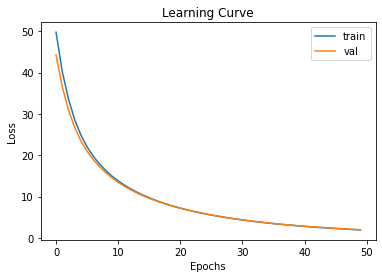

In [1]:
import math
from math import sqrt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# Load data
df = pd.read_csv('5yr.csv')
X = df[['Open', 'High', 'Low', 'Volume', 'Close']]
y = df['Close'].shift(-1)
X = X[:-1]
y = y[:-1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss=MeanSquaredLogarithmicError(),
              optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

mse = model.evaluate(X_test, y_test)
sq= sqrt(mse)
print("Root Mean Squared Error:", sq)

# Plot the learning curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
22/22 [==============================] - 1s 6ms/step - loss: 7955755.0000 - val_loss: 7855396.5000
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 7945878.5000 - val_loss: 7842773.0000
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 7927246.5000 - val_loss: 7815710.5000
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 7889299.0000 - val_loss: 7763297.0000
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 7819255.0000 - val_loss: 7672932.5000
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 7705152.0000 - val_loss: 7530194.0000
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 7534394.5000 - val_loss: 7325622.0000
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 7295325.5000 - val_loss: 7049290.5000
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 6980922.0000 - val_loss: 6692234.5000
Epoch 10/5

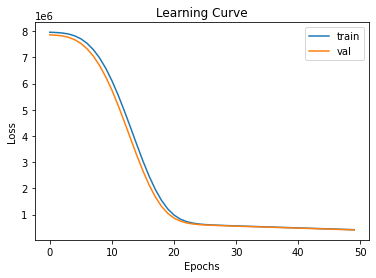

In [1]:
import math
from math import sqrt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('5y.csv')
X = df[['Open', 'High', 'Low', 'Volume', 'Close']]
y = df['Close'].shift(-1)
X = X[:-1]
y = y[:-1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate RMSE and R2 score
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print("RMSE:", rmse)
print("R2 score:", r2)

# Plot the learning curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
